In [1209]:
from PIL import Image
import matplotlib.pyplot as plt
#image = Image.open("ufg_logo.jpg")
image = Image.open("keth.png")
print(f"Image format: {image.format}")
print(f"Image mode: {image.mode}")
print(f"Image size: {image.size}")

#display(image)

Image format: PNG
Image mode: RGB
Image size: (541, 540)


In [1210]:
width = 40
length = 40

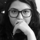

In [1211]:
image = image.resize((width, length))
display(image)

In [1212]:
import numpy as np
# Convert the image to a NumPy array
pixel_array = np.array(image)

# You can now work with pixel_array as a NumPy array
print("Shape of pixel_array:", pixel_array.shape)

Shape of pixel_array: (40, 40, 3)


In [1213]:
pixel_array

array([[[ 32,  32,  32],
        [ 33,  33,  33],
        [ 34,  34,  34],
        ...,
        [242, 242, 242],
        [242, 242, 242],
        [242, 242, 242]],

       [[ 29,  29,  29],
        [ 31,  31,  31],
        [ 32,  32,  32],
        ...,
        [243, 243, 243],
        [243, 243, 243],
        [243, 243, 243]],

       [[ 31,  31,  31],
        [ 27,  27,  27],
        [ 29,  29,  29],
        ...,
        [242, 242, 242],
        [242, 242, 242],
        [242, 242, 242]],

       ...,

       [[ 13,  13,  13],
        [ 11,  11,  11],
        [  7,   7,   7],
        ...,
        [ 43,  43,  43],
        [ 31,  31,  31],
        [ 36,  36,  36]],

       [[ 18,  18,  18],
        [ 16,  16,  16],
        [ 10,  10,  10],
        ...,
        [ 34,  34,  34],
        [ 27,  27,  27],
        [ 41,  41,  41]],

       [[ 19,  19,  19],
        [ 14,  14,  14],
        [  9,   9,   9],
        ...,
        [ 20,  20,  20],
        [ 36,  36,  36],
        [ 45,  45,  45]]

Shape of pixel_array: (40, 40)


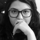

In [1214]:
# Convert the image to grayscale
gray_image = image.convert("L")

# Convert the grayscale image to a NumPy array
pixel_array = np.array(gray_image)

# You can now work with pixel_array as a NumPy array
print("Shape of pixel_array:", pixel_array.shape)

# Display the resized image in the notebook
display(gray_image)

In [1215]:
width, length = pixel_array.shape
width, length

(40, 40)

In [1216]:
def generate_random_individual(width, length):
    size = width * length
    binary_numbers = np.random.randint(0, 2, size=(size, 8), dtype=np.uint8) #binary number str
    binary_representation = ''.join(binary_numbers.ravel().astype(str))
    return binary_representation

In [1217]:
individual = generate_random_individual(width, length)
individual

'100111110011000000011111011011101111010110010110011010111001110010011110110111110000100101011010000111011010110101000110001111100111101011001101101001000001001000110110000110111101011111011000001100011011111100000101000101010010011001000010010100101001111011000011101011011001010110101010011110010001100000000100011101011100110010111010001011011001100100100011000001110000001011101100001100101111100000100011000101101111010001010100010001000100110111001111100110101001000001111001110010001001100011110111100100011010100010011010111111010100101101100101101000011111001001011011101001111011010001111100011011000111111010110111000101100000011110000011100110000111011111110010000011110011000010101110101100001000001100100000110111101001011111101111101100000101000111010110011101001110100111110101101010111100110101001110110110000101100011000110010010001011100000101011011101010110010111001100001110111001010110000001001110010100000110011000010100010001111010000101101001011110000000010101100101011000010

In [1218]:
import numpy as np

def individual_to_array(binary_representation, width, length):
    size = width * length
    binary_length = 8
    assert len(binary_representation) == size * binary_length, "Invalid binary representation length"

    # Split the binary string into 8-character chunks
    binary_chunks = [binary_representation[i:i+binary_length] for i in range(0, size * binary_length, binary_length)]

    # Convert binary chunks to integers using int('11111111', 2)
    integers = [int(chunk, 2) for chunk in binary_chunks]

    # Create a numpy array from the integers
    array = np.array(integers, dtype=np.uint8).reshape(width, length)

    return array


In [1219]:

binary_representation = generate_random_individual(width, length)
array = individual_to_array(individual, width, length)

In [1220]:
def display_individual(individual):
    img = Image.fromarray(np.uint8(individual))
    display(img)

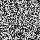

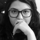

In [1221]:
display_individual(array)
display_individual(pixel_array)

In [1222]:
import numpy as np

def fitness_function(array1, array2):
    if array1.shape != array2.shape:
        raise ValueError("Arrays must have the same shape for comparison")
    # Initialize the score to 0
    score = 0
    # Iterate over the elements of both arrays
    for i in range(array1.shape[0]):
        for j in range(array1.shape[1]):
            if array1[i, j] == array2[i, j]:
                score += 1

    return score

In [1223]:
score = fitness_function(array, pixel_array)
print("Score:", score)

Score: 6


In [1224]:
#TODO:
#Test altering the fitness function
#Rows and columns +20
# log(score) or exp(score)

In [1225]:
def fitness_function2(array1, array2):
    if array1.shape != array2.shape:
        raise ValueError("Arrays must have the same shape for comparison")
    score = 0

    for i in range(array1.shape[0]):
        for j in range(array1.shape[1]):
            if array1[i, j] == array2[i, j]:
                score += 1
    # Check if entire rows match and increment the score by 20 points
    for i in range(array1.shape[0]):
        if np.array_equal(array1[i], array2[i]):
            score += 20
    # Check if entire columns match and increment the score by 20 points
    for j in range(array1.shape[1]):
        if np.array_equal(array1[:, j], array2[:, j]):
            score += 20
            
    return score

In [1226]:
array_list = []
for i in range(2):
    binary_representation = generate_random_individual(width, length)
    array = individual_to_array(individual, width, length)
    array_list.append(array)

In [1227]:
from PIL import Image

In [1228]:
#import numpy as np
#from PIL import Image
#import imageio
#
## Create a list of arrays (n x n)
#array_list = []
#
## You can populate array_list with your own n x n arrays, e.g., random arrays
#n = 100
#for _ in range(100):
#    random_array = np.random.randint(0, 256, size=(n, n), dtype=np.uint8)
#    array_list.append(random_array)
#
## Function to convert an array to an image
#def array_to_image(array):
#    return Image.fromarray(array)
#
## Convert each array in the list to an image
#image_list = [array_to_image(array) for array in array_list]
#
## Save individual images and create a GIF
#output_path = "output.gif"
#imageio.mimsave(output_path, image_list, duration=0.2)  # Adjust the duration as needed (in seconds)
#
## Display or save the GIF
## imageio.mimwrite(output_path, image_list, duration=0.2)  # Uncomment this line if you want to save the GIF
#
#print("GIF created at:", output_path)


In [1229]:
individual

'100111110011000000011111011011101111010110010110011010111001110010011110110111110000100101011010000111011010110101000110001111100111101011001101101001000001001000110110000110111101011111011000001100011011111100000101000101010010011001000010010100101001111011000011101011011001010110101010011110010001100000000100011101011100110010111010001011011001100100100011000001110000001011101100001100101111100000100011000101101111010001010100010001000100110111001111100110101001000001111001110010001001100011110111100100011010100010011010111111010100101101100101101000011111001001011011101001111011010001111100011011000111111010110111000101100000011110000011100110000111011111110010000011110011000010101110101100001000001100100000110111101001011111101111101100000101000111010110011101001110100111110101101010111100110101001110110110000101100011000110010010001011100000101011011101010110010111001100001110111001010110000001001110010100000110011000010100010001111010000101101001011110000000010101100101011000010

In [1230]:
def perturbate_solution(s, n):
    for i in range(n):
        pos = np.random.choice(len(s))
        
        binary_list = list(s)
        
        if binary_list[pos] == '0':
            binary_list[pos] = '1'
        else:
            binary_list[pos] = '0'
        
        s = ''.join(binary_list)
    
    return s

In [1231]:
individual == individual

True

In [1232]:
individual == perturbate_solution(individual, 1)

False

In [1233]:
#Select the temperature change counter
k = 0.95
#Select the temperature cooling Schedule
def cooling_schedule(T, k):
    return k * T

In [1234]:
def repetition_schedule(T):
    #TODO
    return 10

In [1235]:
binary_representation = generate_random_individual(width, length)
binary_representation

'001001001101100010000001111000011110011010111100100000101111000000111110101010101001011100000110111010001100100100010100011011010010101111101010010110010010000111000111110010111010000111010001010010011111000100011111101100110001100110110111101000111111011010110000011111000101111101001101010100111000001010111110100001101111000010001100100101010011110010110110101010101110011100110101011100111110100001101011110111101100100101100111000010011100001111101000101110111010000110111101111001011011011011011001110000101001001110111110110100110101110000000000001100101110100011011110111000110001111101001110000010000111101011000010001111010010110100101101000001000101000111111011011100100010111111000011111110110001010111011100101010000000101000010010010111001111010001101001100100011100000111000111011110001000100111001101010010101100011111000011100100000010101000000001011010110101000011111110010010000110101001001110001011011011101100010110000110001101100010000111001001001110110111101111011100100110101

[[159  48  31 ...  24   4 117]
 [204 186  45 ... 183  22   7]
 [131 152 119 ...  81  30 133]
 ...
 [ 60 188  57 ... 158 205  47]
 [120  12 200 ... 184 125 165]
 [ 78  53 151 ... 148   2 145]]


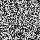

In [1236]:
array = individual_to_array(individual, width, length)
print(array)
display_individual(array)

In [1237]:
s0 = generate_random_individual(width, length)


individual_to_array(s0, width, length)

array([[ 58,  64,  29, ...,  51,  69, 216],
       [195,  98, 168, ...,  78, 183,  66],
       [228,  76, 227, ..., 196, 110, 101],
       ...,
       [175, 113,  37, ..., 197, 249, 139],
       [ 89, 122, 189, ...,  92,  87, 209],
       [249, 133, 176, ...,  63, 155,  80]], dtype=uint8)

In [1238]:
pixel_array

array([[ 32,  33,  34, ..., 242, 242, 242],
       [ 29,  31,  32, ..., 243, 243, 243],
       [ 31,  27,  29, ..., 242, 242, 242],
       ...,
       [ 13,  11,   7, ...,  43,  31,  36],
       [ 18,  16,  10, ...,  34,  27,  41],
       [ 19,  14,   9, ...,  20,  36,  45]], dtype=uint8)

In [1239]:
s0

'001110100100000000011101101101100001001100111110111101101100111101001111000000011100101111010111010101010111000110000101110101000101110111111111111010010110110011011000100001110001110010011001010010001010010110000101101100100010001010101010011001010011101111100010000110010111001110111011010010110011001101000101110110001100001101100010101010001100100011110111011010011101011101111101100100101001010000000100111011000010010000001100111101100101110101101001001100101000110011100001011100111110010011011010011011100000111111100000111111101111010001001111111011011101111011010100000100101110111001011011111111011110010001001110101101110100001011100100010011001110001101100100101010110101010111110010000101110001001001111001100110001101000100110010101110111010111101011001111000100011100000000011000101110101101001001010011011001000110101100011011000001000001000011000000001100110011101010110100001010001001101000101100000010010000011011000110001000110111001100101011000101110111101000110011010101111110

In [1240]:
def individual_score(phrase, individual_phrase):
    phrase_list = [i for i in phrase]
    individual_list = [i for i in individual_phrase]    
    score = 0
    for letter_pos in range(len(phrase)):
        if individual_list[letter_pos] == phrase_list[letter_pos]:
            score += 1
            
    if score == 0:
        score = 0.00000001
    else:
        score = (score / len(phrase))
        
    return 1 - score

In [1241]:
import numpy as np

def array_to_individual(array):
    assert isinstance(array, np.ndarray), "Input must be a numpy array"
    assert array.ndim == 2, "Input array must be 2-dimensional"
    
    width, length = array.shape
    binary_chunks = []

    # Convert integers to binary strings and pad with zeros to make each chunk 8 characters long
    for row in range(width):
        for col in range(length):
            binary_chunk = format(array[row, col], '08b')
            binary_chunks.append(binary_chunk)

    # Concatenate binary chunks to form the binary representation
    binary_representation = ''.join(binary_chunks)

    return binary_representation

In [1242]:
#Select a initial Solution
s0 = generate_random_individual(width, length)
observation = 0

min_temperature = 0.0000001
max_temperature = 1
score_list = []
bin_list = []
prob_list = []
temp_list = []
#max_score_list, min_score_list = [], []
#Select the temperature change counter
k = 0.9997
max_score = fitness_function(pixel_array, pixel_array)
solution_individual = array_to_individual(pixel_array)

#Select an initial temperature
T = max_temperature

while T > min_temperature:
    iterations_over_T = repetition_schedule(T)
    
    #max_score_over_t, min_score_over_t = 0, 0 
    #score_over_t = []
    for i in range(iterations_over_T):
        
        #Generate a new solution
        s1 = perturbate_solution(s0, 1)
        #s1_array = individual_to_array(s1, width, length)
        #s0_array = individual_to_array(s0, width, length)
        #
        #s1_score = - fitness_function(s1_array, pixel_array)
        #s0_score = - fitness_function(s0_array, pixel_array)
        
        s0_score = individual_score(s0, solution_individual)
        s1_score = individual_score(s1, solution_individual)
        delta = s1_score - s0_score

        p = np.exp(-delta/T)
        if delta <= 0:
            s0 = s1
            
        else: #delta > 0
            
            if np.random.random() > p:
                s0 = s1
                
        observation += 1
        score_list.append(s0_score)
        prob_list.append(p)
        temp_list.append(T)
        #score_over_t.append(s0_score)
    #max_score_list.append(np.max(score_over_t))
    #min_score_list.append(np.min(min_score_over_t))
    
    T = cooling_schedule(T, k)
    
    #Helper Functions
    
    if observation % 1000 == 0:
        bin_list.append(s0)
        
    if observation % 10000 == 0:
        print(f"Observation: {observation} | Temperature {T} | score: {s0_score} | p: {p}")
        #print(decode_binary_to_phrase(s0))
        print(s0)
        
    
    
    if s0_score <= 0.01:
        
        print(f"Observation: {observation} | Temperature {T} | score: {s0_score} | p: {p}")
        #print(decode_binary_to_phrase(s0))
        print(s0)
        
        break

Observation: 10000 | Temperature 0.7407848779433163 | score: 0.23007812500000002 | p: 0.9998945747303789
0010000100100001101010110011000110011110001001100110001100011001000100101001000011011100000001110001011100101101111011110100000010010010111110000101110100001111111110110001101100010000001011010100110000110100100000011010111101001011001110110110110000001110111010001011111101110011110100101110110011110110111000100110101000011001000111101100100000011110100001100010101001011100111101110101001010010010100100010011010001001110000110110110001001011010100110001110000110001001011111000101110000101101101110110001100000000111000010111011100101100000001111010111010101110011001001000011100011010011001001001111110101100011001000111111001110010001000101010001101111010101001011000111010101110001001111000111011000111011001101101011011000101111000000000110110110001010110001111000111000011111000111101010101010000101100011010111000101000111001101010110000000101101101010010100101001110000000110100001000

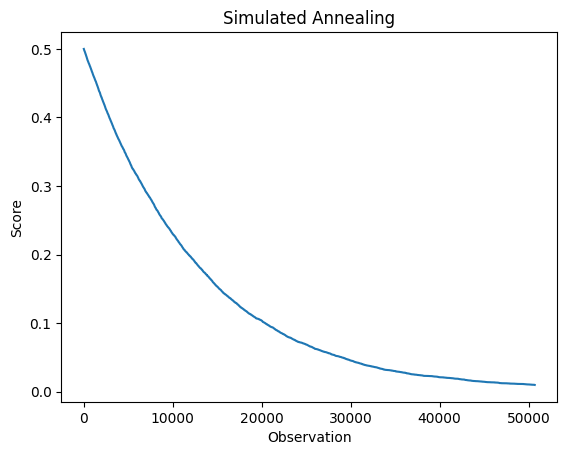

In [1244]:
plt.plot(score_list);
plt.title("Simulated Annealing");
plt.xlabel("Observation");
plt.ylabel("Score");

In [1245]:
final_array_list = [individual_to_array(bin_string, width, length) for bin_string in bin_list]
final_array_list

[array([[101, 105, 189, ..., 212, 226,  46],
        [ 25, 120, 220, ...,   3, 247, 149],
        [  4, 219, 199, ..., 222,  59, 151],
        ...,
        [218,   3,  81, ...,  67,  20, 212],
        [ 21, 159,   0, ..., 106, 153, 191],
        [242,   1,  49, ..., 243, 151,  90]], dtype=uint8),
 array([[101, 105, 189, ..., 212, 226,  46],
        [ 25, 120, 220, ...,   3, 247, 149],
        [  4, 219, 215, ..., 222,  59, 151],
        ...,
        [218,   3,  81, ...,  67,  20, 212],
        [ 22, 157,   0, ..., 106, 155,  63],
        [242,   9,  17, ..., 243,  23,  90]], dtype=uint8),
 array([[101, 105, 189, ..., 214, 226,  46],
        [ 25, 120, 220, ...,   3, 243, 149],
        [  4, 219, 213, ..., 254,  59, 151],
        ...,
        [154,   3,  81, ...,  67,  20,  84],
        [ 22, 157,   0, ..., 106, 155,  47],
        [242,   9,  17, ..., 241,  23,  90]], dtype=uint8),
 array([[ 37,  41, 185, ..., 214, 226,  42],
        [ 25, 124, 204, ...,   3, 243, 149],
        [  4, 15

In [1246]:
len(final_array_list)

50

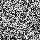

In [1247]:
import os
import imageio.v2 as imageio
import numpy as np
from IPython.display import display, Image

def generate_GIF(image_list):
    image_folder = "temp_images"
    os.makedirs(image_folder, exist_ok=True)

    image_files = []

    for i, image_array in enumerate(image_list):
        image_file = os.path.join(image_folder, f"image_{i}.png")
        # Convert the NumPy array to an image and save it
        imageio.imwrite(image_file, image_array)
        image_files.append(image_file)

    output_gif = "output.gif"
    images = [imageio.imread(image_file) for image_file in image_files]
    imageio.mimsave(output_gif, images, duration=0.2)  # Set the duration (in seconds) per frame

    # Clean up temporary image files
    for image_file in image_files:
        os.remove(image_file)

    # Path to your GIF file
    gif_path = "output.gif"

    # Display the GIF
    display(Image(filename=gif_path))


generate_GIF(final_array_list)